In [35]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
wine = load_wine(as_frame=True)

wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [9]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [10]:
wine.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [11]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

In [25]:
wine.frame.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

non ho nan, ottimo

In [26]:
[wine.data, wine.target]

[     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid_phenols

In [28]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)

accuracy_score(y_train, y_train_pred)


1.0

In [33]:
y_test_pred = dtc.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9629629629629629

In [38]:

def create_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              # xticklabels=['Predetto Negativo (No Ictus)', 'Predetto Positivo (Ictus)'],
              # yticklabels=['Reale Negativo (No Ictus)', 'Reale Positivo (Ictus)']
              )
  plt.xlabel('Previsione')
  plt.ylabel('Verità')
  plt.title('Matrice di Confusione')
  plt.show()


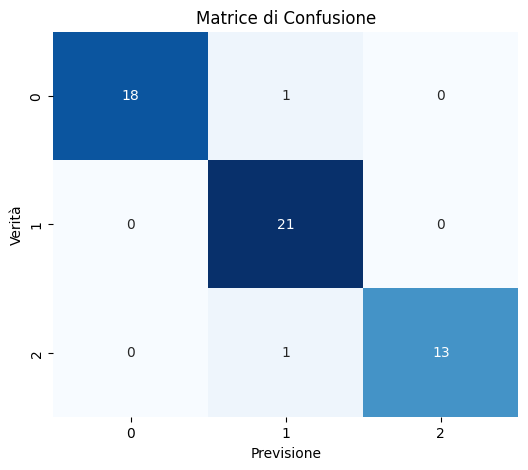

In [39]:
create_confusion_matrix(y_test, y_test_pred)

In [42]:
wine.data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [43]:
dotfile = open("tree.dot", 'w')
export_graphviz(dtc, out_file = dotfile, feature_names = wine.data.columns)
dotfile.close()

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="color_intensity <= 3.82\ngini = 0.658\nsamples = 124\nvalue = [40, 50, 34]"] ;
1 [label="proline <= 1010.0\ngini = 0.083\nsamples = 46\nvalue = [2, 44, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="ash <= 3.07\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]"] ;
1 -> 5 ;
6 [label="flavanoids <= 1.4\ngini = 0.567\nsamples = 78\nvalue = [38, 6, 34]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]"] ;
6 -> 7 ;
8 [label="proline <= 724.5\ngini = 0.236\nsamples = 44\nvalue = [38, 6, 0]"] ;
6 -> 8 ;
9 [label="malic_acid <= 3.92\ngini = 0.245\nsamples = 7\nvalue = [1, 6, 0]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]"] ;
9 -> 11 ;
12 [label="gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]"] ;
8 -> 12 ;
}

1
accuracy train: 0.6612903225806451


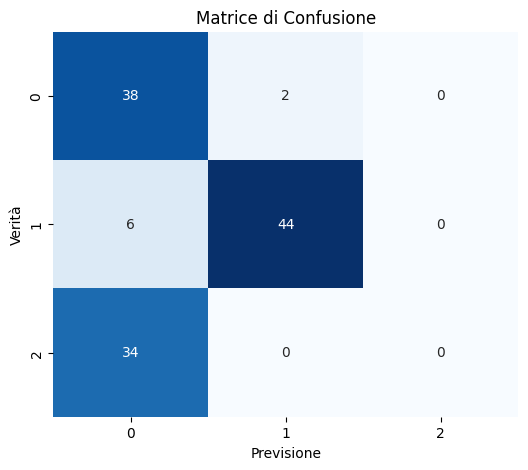

None
accuracy test 0.6111111111111112


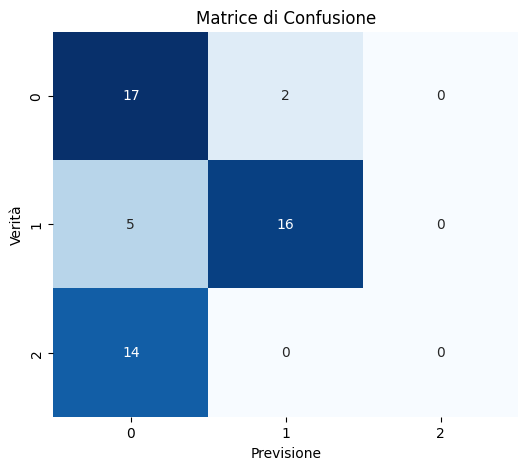

None
------------------------------
2
accuracy train: 0.9435483870967742


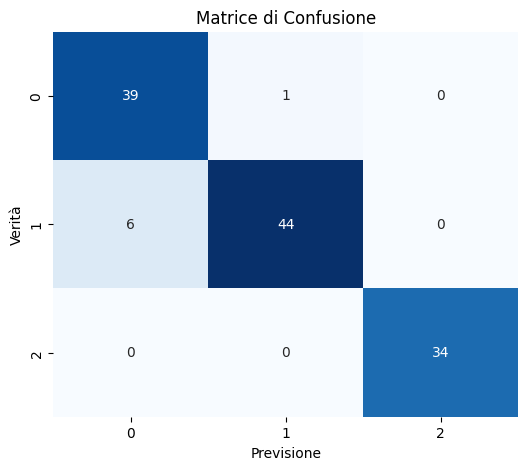

None
accuracy test 0.8518518518518519


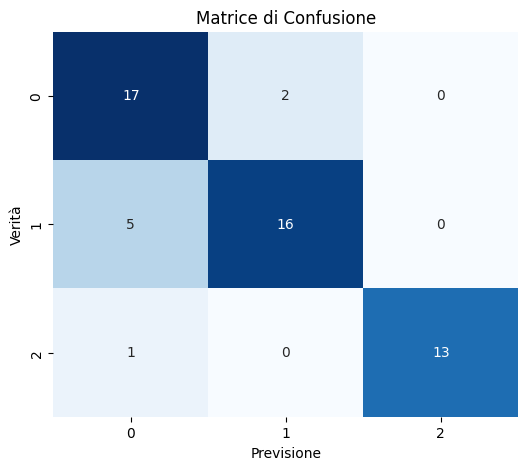

None
------------------------------
3
accuracy train: 0.9919354838709677


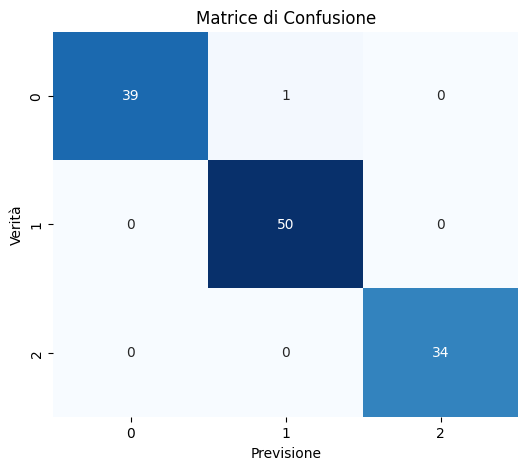

None
accuracy test 0.9444444444444444


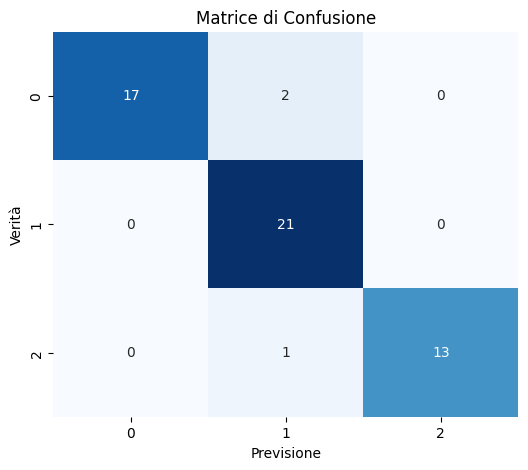

None
------------------------------
4
accuracy train: 1.0


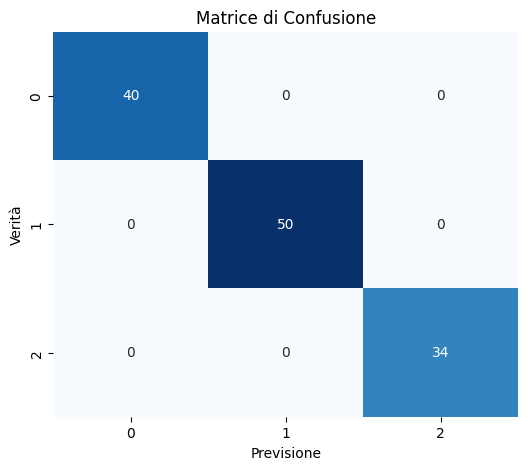

None
accuracy test 0.9444444444444444


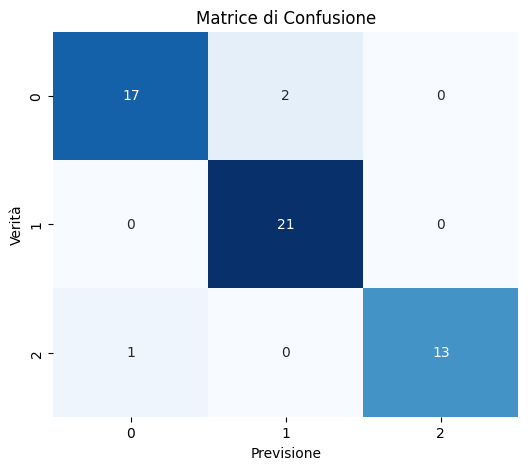

None
------------------------------
5
accuracy train: 1.0


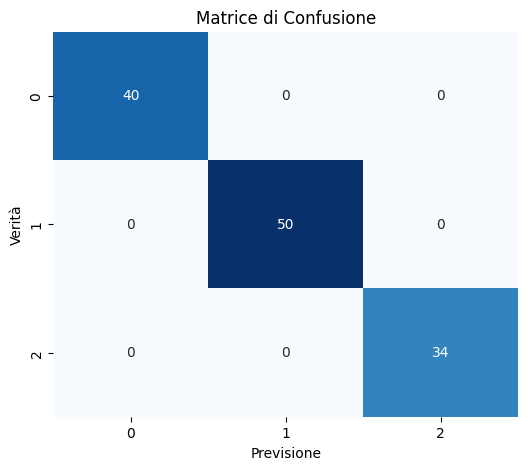

None
accuracy test 0.9629629629629629


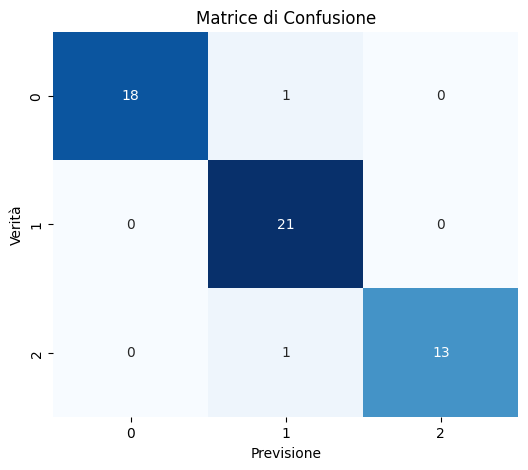

None
------------------------------
6
accuracy train: 1.0


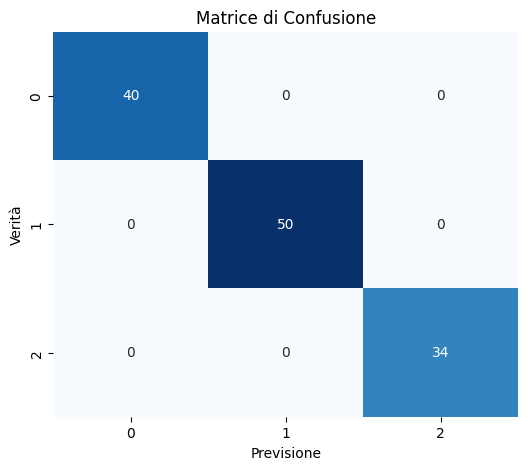

None
accuracy test 0.9629629629629629


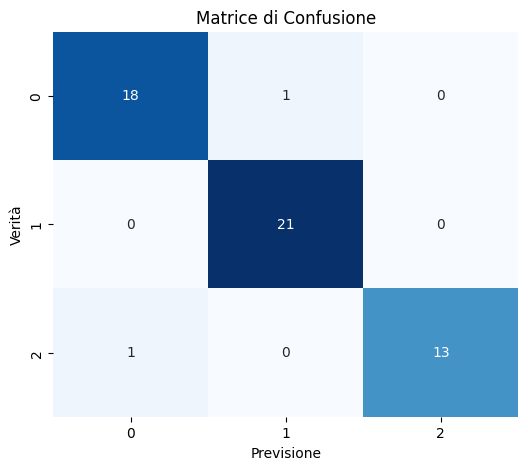

None
------------------------------


In [48]:
for i in range(1,7):
  print(i)
  dtc = DecisionTreeClassifier(max_depth=i)

  dtc.fit(X_train, y_train)

  y_train_pred = dtc.predict(X_train)

  print(f'accuracy train: {accuracy_score(y_train, y_train_pred)}')
  print(create_confusion_matrix(y_train, y_train_pred))
  
  
  y_test_pred = dtc.predict(X_test)

  print(f'accuracy test {accuracy_score(y_test, y_test_pred)}')
  
  print(create_confusion_matrix(y_test, y_test_pred))
  
  print('-'*30)



probabilmente la soluzione migliore è quella a 5 livelli